In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
mlcc = pd.read_excel("C:/Users/tjhaveri/OneDrive - Tesla/TJ Files/Historical Data/Heatmap df.xlsx",sheet_name = "Query - MLCC")

In [38]:
mlcc

,Case Area,Capacitance,TPN,Cheapest Price,Cheapest Vendor
0,0.411727,-3.327902,2000058,0.00240,Kemet
1,0.064940,-1.000000,2000317,0.00330,AVX
2,0.064940,-1.000000,2000317,0.00170,AVX
3,0.064940,-1.000000,2000317,0.00083,AVX
4,0.667000,0.000000,2000888,0.02590,TDK Corporation
...,...,...,...,...,...
1408,0.064940,-0.657577,1815918-00-A,0.00040,Taiyo Yuden
1409,0.411727,0.672098,1817143-00-A,0.00040,TDK Corporation
1410,0.888849,0.342423,1862945-00-A,0.00040,TDK Corporation
1411,0.888849,0.342423,1862945-00-A,0.00040,TDK Corporation


In [39]:
# selecting specific columns
columns = mlcc[['Case Area','Capacitance','Cheapest Price']]
columns.head()

,Case Area,Capacitance,Cheapest Price
0,0.411727,-3.327902,0.00240
1,0.064940,-1.000000,0.00330
2,0.064940,-1.000000,0.00170
3,0.064940,-1.000000,0.00083
4,0.667000,0.000000,0.02590


In [34]:
query = columns.groupby(['Case Size','Capacitance x Voltage']).mean()
query.head(10)

Cheapest Price
Case Size Capacitance x Voltage                
0201      0.000010                     0.001700
          0.000025                     0.000400
          0.000050                     0.004330
          0.000060                     0.001700
          0.000090                     0.002000
          0.000117                     0.005450
          0.000150                     0.000543
          0.000170                     0.000400
          0.000235                     0.003437
          0.000250                     0.002300

In [35]:
query = query.reset_index()
query.head()

,Case Size,Capacitance x Voltage,Cheapest Price
0,0201,0.000010,0.00170
1,0201,0.000025,0.00040
2,0201,0.000050,0.00433
3,0201,0.000060,0.00170
4,0201,0.000090,0.00200


In [41]:
major_ticks = np.arange(0,200,20)
minor_ticks = np.arange(0,180,5)

fig = plt.figure(figsize = (7))
ax = fig.add_subplot(1,1,1)
s = ax.scatter('Case Size','Capacitance x Voltage', c = 'Cheapest Price', data = query, cmap = 'Blues_r', marker = 's',s = 190)
ax.axis([query['Case Size'].min()-10, query['Case Size'].max()+10, query['Capacitance x Voltage'].min()-10, query['Capacitance x Voltage'].max()+10])
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
ax.set_yticks(major_ticks)                                                                                                                                                      
ax.grid(which='both', alpha = 0.3)                                                                                                           
ax.grid(which='major', alpha=0.3) 
ax.set_xlabel('Case Size', fontsize=10);
ax.set_ylabel('Capacitance x Voltage', fontsize=10);
ax.set_title('Cheapest Price based of Case Size, Capacitance & Voltage', size = 15)

cbar = plt.colorbar(mappable = s,ax = ax)

plt.show()

TypeError: Value after * must be an iterable, not int

In [39]:
import seaborn as sns; 
query.pivot('Case Size', 'Capacitance x Voltage')['Cheapest Price'].head()

Capacitance x Voltage,0.000010,0.000025,0.000040,0.000050,0.000060,0.000065,0.000075,0.000090,0.000100,0.000110,...,296.100000,350.000000,352.000000,400.000000,470.000000,500.000000,550.000000,630.000000,752.000000,1000.000000
Case Size,,,,,,,,,,,,,,,,,,,,,
0201,0.0017,0.0004,NaN,0.004330,0.0017,NaN,NaN,0.002000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0402,NaN,NaN,NaN,0.004217,0.0062,0.0053,0.0022,0.004265,0.0052,0.001875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0612,NaN,NaN,0.0292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.041615,NaN,0.025353,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
plt.figure(figsize=(9,9))
pivot_table = query('Case Size', 'Capacitance x Voltage','Cheapest Price')
plt.xlabel('Capacitance x Voltage', size = 15)
plt.ylabel('Case Size', size = 15)
plt.title('Cheapest Price based of Case Size, Capacitance & Voltage', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

TypeError: 'DataFrame' object is not callable

<Figure size 648x648 with 0 Axes>

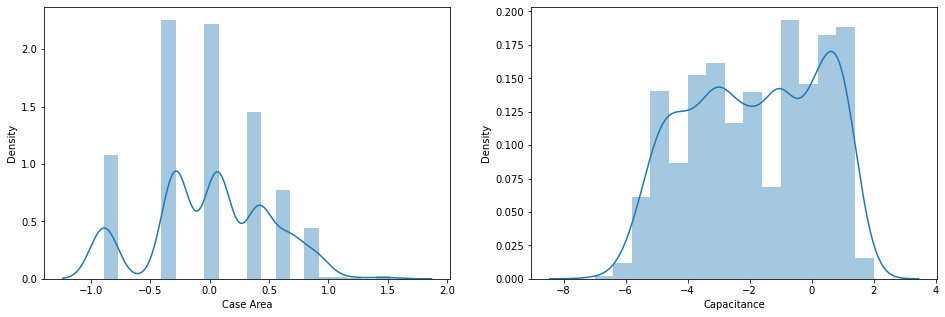

In [43]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_df['Case Area'])
plt.subplot(1,2,2)
sns.distplot(new_df['Capacitance'])
plt.show()

In [41]:
from scipy import stats
 
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
 
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(new_df['Case Area'])
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(new_df['Case Area'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

ValueError: Data must be positive.

In [20]:
print("Highest allowed",columns['Case Area'].mean() + 3*columns['Case Area'].std())
print("Lowest allowed",columns['Case Area'].mean() - 3*columns['Case Area'].std())

Highest allowed 1.5670937403494145
Lowest allowed -1.5184398794376204


In [21]:
columns[(columns['Case Area'] > 1.5670937403494145) | (columns['Case Area'] < -1.5184398794376204)]

,Case Area,Capacitance,Cheapest Price
486,1.750123,-4.000000,0.0460
952,1.806180,-2.657577,0.0583
1202,1.806180,-2.657577,0.0477
1203,1.806180,-2.657577,0.0477
1224,1.750123,-3.823909,0.0547
1232,1.681241,-2.823909,0.2497


In [24]:
columns.shape[0]

1512

In [26]:
new_df = columns[(columns['Case Area'] < 1.5670937403494145) & (columns['Case Area'] > -1.5184398794376204)]
new_df

,Case Area,Capacitance,Cheapest Price
0,0.411727,-3.327902,0.0024
1,0.411727,-3.327902,0.0037
2,0.064940,-1.000000,0.0033
3,0.064940,-1.000000,0.0017
4,0.064940,-1.000000,0.0001
...,...,...,...
1507,0.064940,-0.657577,0.0004
1508,0.411727,0.672098,0.0004
1509,0.888849,0.342423,0.0004
1510,0.888849,0.342423,0.0004


In [27]:
x = new_df[['Case Area','Capacitance']]
y = new_df[['Cheapest Price']]

In [28]:
import seaborn as sns

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [30]:
from sklearn.linear_model import LinearRegression
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [31]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  [0.10624164]
Coefficients:


[('Case Area', array([-0.00986329,  0.02924459]))]

In [32]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [[-0.04062184]
 [ 0.12671926]
 [ 0.09007346]
 [ 0.08150624]
 [ 0.03729332]
 [ 0.11931805]
 [ 0.05226165]
 [ 0.0857685 ]
 [-0.02713415]
 [-0.03120987]
 [ 0.09152025]
 [-0.01986272]
 [ 0.07572626]
 [-0.04363604]
 [-0.0313964 ]
 [-0.03120987]
 [-0.05892741]
 [ 0.08637054]
 [ 0.11561513]
 [ 0.12890742]
 [ 0.13892143]
 [ 0.14143925]
 [ 0.13892143]
 [ 0.07635653]
 [ 0.05633737]
 [ 0.08984422]
 [-0.01859481]
 [ 0.11931805]
 [ 0.13484571]
 [-0.06306053]
 [ 0.12183588]
 [ 0.11712989]
 [-0.00136324]
 [ 0.05226165]
 [-0.00136324]
 [ 0.13831939]
 [ 0.13892143]
 [-0.03714816]
 [-0.01859481]
 [ 0.0798302 ]
 [ 0.04117364]
 [ 0.14143925]
 [ 0.00378648]
 [ 0.00378648]
 [-0.03181834]
 [ 0.11734438]
 [ 0.12890742]
 [ 0.04117364]
 [ 0.12671926]
 [ 0.11219466]
 [ 0.00318444]
 [ 0.0565239 ]
 [ 0.1090748 ]
 [ 0.0798302 ]
 [ 0.03752257]
 [ 0.13484571]
 [ 0.04369147]
 [ 0.04099625]
 [ 0.09601175]
 [ 0.13142524]
 [ 0.10218065]
 [ 0.01397688]
 [ 0.0798302 ]
 [ 0.10560112]
 [ 0.14485972]


In [34]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 0.25
Mean Absolute Error: 0.054109801917518054
Mean Square Error: 0.005428666746394059
Root Mean Square Error: 0.07367948660512001
